In [37]:
from FHN_PDE_Simulator import FHN_PDE_Simulator as simulator

import SALib.sample as sampler
from SALib.analyze import sobol, morris
import numpy as np

In [38]:
problem = {
    'num_vars': 5,
    'names': ['Du','Dv','a','b','epsilon'],
    'bounds': [[0.5, 1.0],
               [0.0, 1.0],
               [0.05, 0.15],
               [0.2, 0.7],
               [0.001, 0.02]]
}

In [39]:
param_values = sampler.sobol.sample(problem, 32)

In [46]:
Y = []

for i, values in enumerate(param_values):
    params = dict(zip(problem['names'],values))
    sim = simulator(size=30,**params)
    sim.set_initial_conditions('spiral_obstacle')
    u = sim.run_simulation(100)
    mean_u = np.mean(u)
    Y.append(mean_u)
    
Y = np.array(Y).reshape(-1,)

Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0065 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0066 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0058 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0054 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0053 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0052 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0052 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0052 s
Uruchamiam symulację PDE (Solver: euler, Rozdz: 30x30, Kroki: 100)...
Symulacja PDE zakończona. Czas: 0.0052 s
U

{'S1': array([0.89874113, 0.02111966, 0.02426941, 0.01998415, 0.03122474]), 'S1_conf': array([0.42285412, 0.04005977, 0.06870012, 0.03809979, 0.05733011]), 'ST': array([0.86212316, 0.00747486, 0.02513871, 0.00530746, 0.01687866]), 'ST_conf': array([0.33180783, 0.00525698, 0.01454593, 0.00227356, 0.01214494]), 'S2': array([[        nan, -0.08909529, -0.05890963, -0.08227807, -0.09465337],
       [        nan,         nan, -0.00117073,  0.00177313,  0.00986283],
       [        nan,         nan,         nan, -0.01910287, -0.01756059],
       [        nan,         nan,         nan,         nan, -0.01002681],
       [        nan,         nan,         nan,         nan,         nan]]), 'S2_conf': array([[       nan, 0.46259068, 0.46683083, 0.46555544, 0.45521375],
       [       nan,        nan, 0.05890599, 0.06144523, 0.06597966],
       [       nan,        nan,        nan, 0.1148982 , 0.11494373],
       [       nan,        nan,        nan,        nan, 0.0489632 ],
       [       nan,     

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

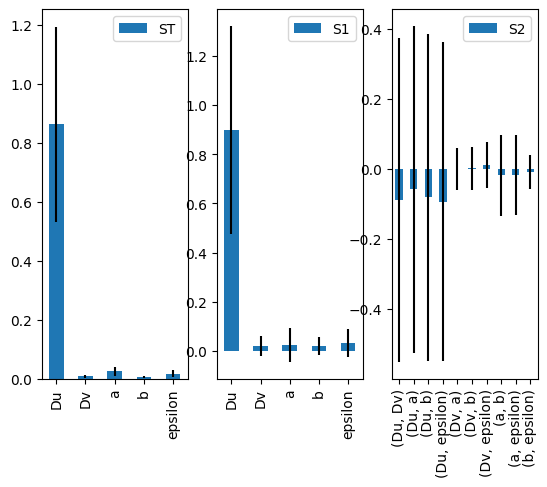

In [47]:
Si = sobol.analyze(problem, Y)
print(Si)

Si.plot()

{'names': array(['Du', 'Dv', 'a', 'b', 'epsilon'], dtype='<U7'), 'mu': masked_array(data=[-0.003610057422794064, -0.0007397245587093329,
                   -0.0009026166946937732, -6.858321886490503e-05,
                   -0.0004084434786602517],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'mu_star': masked_array(data=[0.16652215160026854, 0.33002455632796784,
                   0.33009578416586693, 0.33007490105941817,
                   0.16523604975904913],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'sigma': array([0.23525964, 0.33264388, 0.3327157 , 0.33269642, 0.23528676]), 'mu_star_conf': masked_array(data=[0.03874239176989094, 0.0006286594014086212,
                   0.000668717159133312, 0.0006403115053676246,
                   0.0350141406955634],
             mask=[False, False, False, False, False],
       fill_value=1e+20)}


<Axes: >

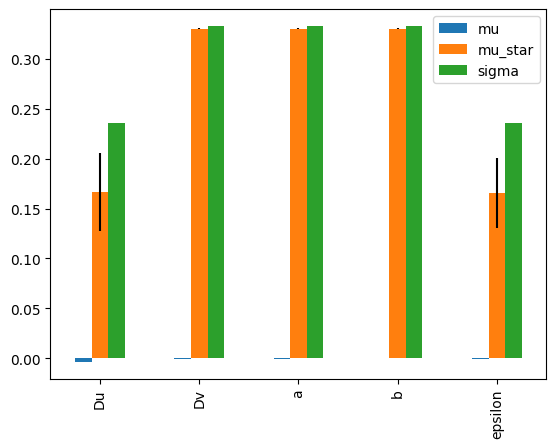

In [50]:
Mi = morris.analyze(problem,param_values,Y)
print(Mi)
Mi.plot()